- Quels sont les facteurs qui influencent le risque de défaut d'un emprunteur ?

- Dans quelle mesure lle risque de défaut change-t-elle pour une variation donnée d'un facteur ?


In [122]:
import pandas as pd
import numpy as np
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('C:\\Users\\soumi\\Downloads\\german_credit_data.csv')

# Affichage des cinq premières lignes du dataframe
print(df.head())

  att1  att2 att3 att4  att5 att6 att7  att8 att9 att10  ...  att12 att13  \
0  A11     6  A34  A43  1169  A65  A75     4  A93  A101  ...   A121    67   
1  A12    48  A32  A43  5951  A61  A73     2  A92  A101  ...   A121    22   
2  A14    12  A34  A46  2096  A61  A74     2  A93  A101  ...   A121    49   
3  A11    42  A32  A42  7882  A61  A74     2  A93  A103  ...   A122    45   
4  A11    24  A33  A40  4870  A61  A73     3  A93  A101  ...   A124    53   

   att14 att15 att16  att17 att18  att19 att20 class  
0   A143  A152     2   A173     1   A192  A201     1  
1   A143  A152     1   A173     1   A191  A201     2  
2   A143  A152     1   A172     2   A191  A201     1  
3   A143  A153     1   A173     2   A191  A201     1  
4   A143  A153     2   A173     2   A191  A201     2  

[5 rows x 21 columns]


In [124]:
colonnes_selectionnees = ['att2', 'att5', 'att8', 'att11']

# Calculer la matrice de corrélation pour les colonnes sélectionnées
corr_matrix = df[colonnes_selectionnees].corr()

# Afficher la matrice de corrélation
print(corr_matrix)

           att2      att5      att8     att11
att2   1.000000  0.624984  0.074749  0.034067
att5   0.624984  1.000000 -0.271316  0.028926
att8   0.074749 -0.271316  1.000000  0.049302
att11  0.034067  0.028926  0.049302  1.000000


In [125]:
plt.figure(figsize=(12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Axes: >

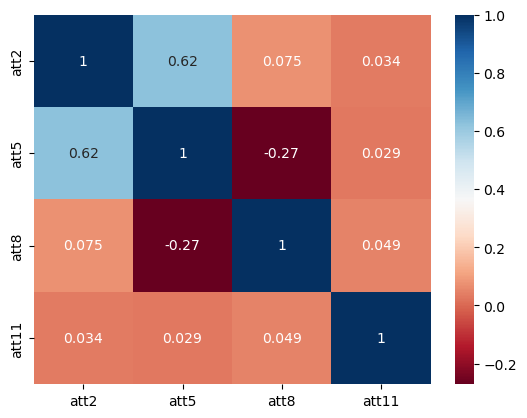

In [126]:
sns.heatmap(corr_matrix, annot=True, cmap="RdBu")

In [127]:
df.shape

(1000, 21)

In [128]:
# Affichage des attributs du dataset
print('Les attributs du dataset :')
print(df.columns)


Les attributs du dataset :
Index(['att1', 'att2', 'att3', 'att4', 'att5', 'att6', 'att7', 'att8', 'att9',
       'att10', 'att11', 'att12', 'att13', 'att14', 'att15', 'att16', 'att17',
       'att18', 'att19', 'att20', 'class'],
      dtype='object')


# Visualisation :

mesure la relation lineaire entre 2 variables :

C:\ProgramData\Application Data\anaconda 123\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


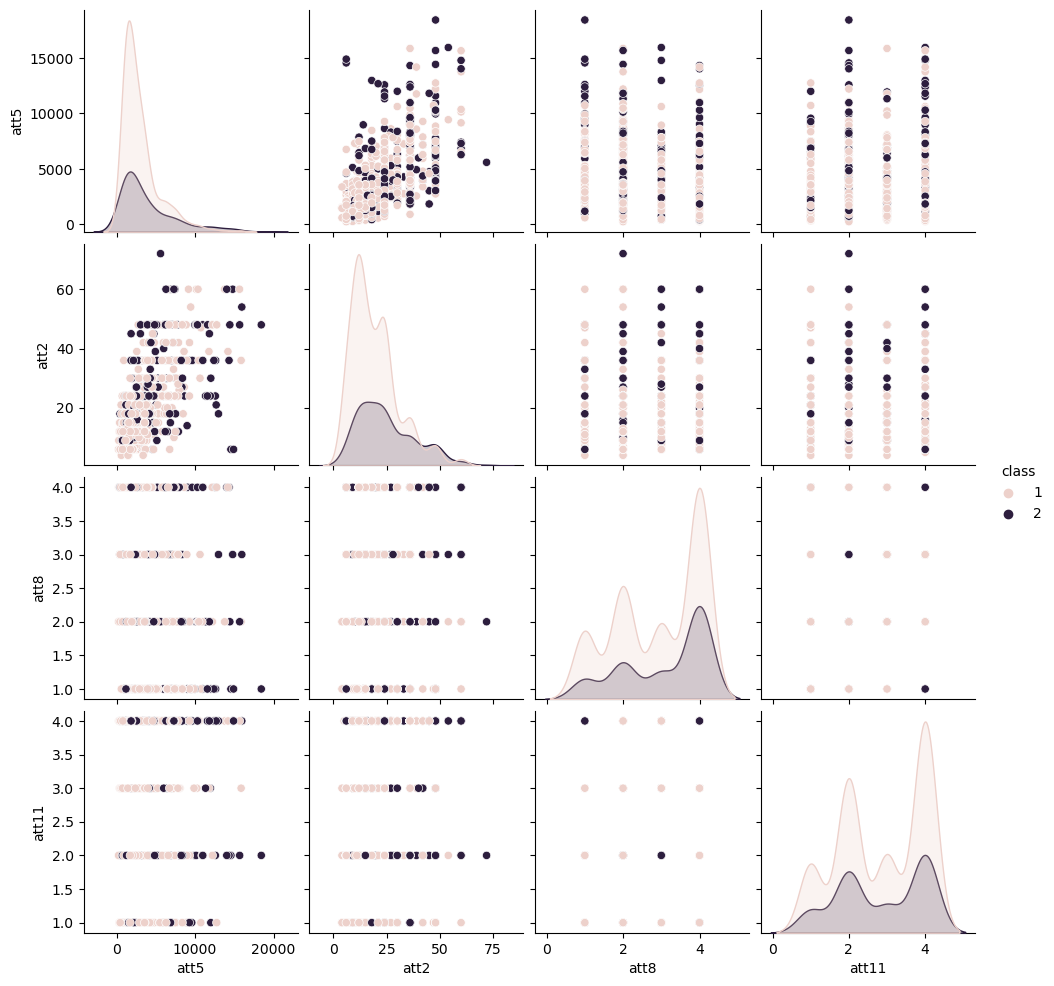

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher uniquement les premières 5 variables (attributs)
sns.pairplot(df,hue='class', vars=['att5', 'att2', 'att8', 'att11'])
plt.show()


In [130]:
# Afficher les classes résultantes à partir de la colonne 'class' par exemple
print('\nLes classes résultantes :')
print(df['class'].unique())



Les classes résultantes :
[1 2]


In [131]:
# Séparation des caractéristiques (X) et de la variable cible (y)
X = df[['att2', 'att5', 'att8', 'att11']]  # Sélection des colonnes spécifiées
y = df['class']  # Variable cible

# Affichage des premières lignes de X et y pour vérification
print("Ensemble de caractéristiques (X) :")
print(X.head())
print("\nVariable cible (y) :")
print(y.head())


Ensemble de caractéristiques (X) :
   att2  att5  att8  att11
0     6  1169     4      4
1    48  5951     2      2
2    12  2096     2      3
3    42  7882     2      4
4    24  4870     3      4

Variable cible (y) :
0    1
1    2
2    1
3    1
4    2
Name: class, dtype: int64


In [132]:
# Creation de l'ensemble de données de test et d'entrainement
X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=0.25, random_state=0)

In [133]:
# On initialise un nouvel objet de mise à l'échelle pour normaliser les données d'entrée
sc=StandardScaler()

In [134]:
# ajuster le modele sur les données d'entrainement
sc.fit(X_train)

StandardScaler()

In [135]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [136]:
# On applique le scaler sur l'ensemble de test et d'entrainement
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

Partie 2 : Entrainement¶

In [137]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=100, random_state=0)

In [138]:
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=100, multi_class='warn', random_state=0, solver='warn')

essayer de faire des predictions :

In [139]:
y_pred = lr.predict(X_test_std)

In [140]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

on va evaluer est ce que la  si la prédiction est correcte ou non pour les 20 premiers

In [141]:
# Création d'un DataFrame pour stocker les prédictions
prediction = pd.DataFrame()
# Ajout des valeurs actuelles dans la colonne 'valeur_actuelle'
prediction['valeur_actuelle'] = y_test
# Ajout des valeurs prédites dans la colonne 'valeur_predite'
prediction['valeur_predite'] = y_pred
# Ajout d'une colonne pour indiquer si la prédiction est correcte ou non
prediction['correction'] = prediction['valeur_actuelle'] == prediction['valeur_predite']

# Affichage des résultats pour les 20 premiers patients
print('\nRésultats pour 20 patients :\n')
print(prediction.head(20))



Résultats pour 20 patients :

     valeur_actuelle  valeur_predite  correction
993                1               1        True
859                1               1        True
298                1               1        True
553                1               1        True
672                1               2       False
971                1               1        True
27                 1               1        True
231                1               1        True
306                1               1        True
706                2               2        True
496                2               2        True
558                2               1       False
784                1               1        True
239                1               1        True
578                2               1       False
55                 1               1        True
906                1               1        True
175                2               1       False
14                 1               1  

comme vous voyez les prediction sont similaire au valeurs que ona dans le plus part les lignes ,
alors on peut dire que le modele du regression logistique est bien adapter .

In [142]:
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()
score = correct / (correct + incorrect) * 100

print('Score =')
score

Score =


72.39999999999999

on a obtenue un score de 72,39 ,alors notre modele predit correctement le risque des emprunteurs 
d'environ 72 % d temps sur les donnees de test ,
cela indique que le modele a une performance raisonnable.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn import svm,datasets

In [2]:
from sklearn.svm import SVC ,LinearSVC

In [24]:
x = df[['att8', 'att13']].values

# Assigner les étiquettes cibles à y
y = df['class'].values

In [25]:
h =0.5 # Augmenter la valeur de l'incrément h
C=1.0  #parametre de régularisation

In [26]:
svc = svm.SVC(kernel='linear',C=C)
lin_svc = LinearSVC(dual=False,max_iter=10000)

In [27]:
#créer la surface de décision discretisé
x_min,x_max=x[:,0].min() - 1,x[:,0].max()+1
y_min,y_max=x[:,1].min() - 1,x[:,1].max()+1

In [28]:

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles=['SVC with linear kerne','LinearSVC(linear kernel)']


In [29]:
xx=np.array(xx)
yy=np.array(yy)

In [30]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et ensemble de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [31]:
# Ajuster le modèle SVC aux données d'apprentissage
svc.fit(x_train, y_train)

SVC(kernel='linear')

NotFittedError: This LinearSVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

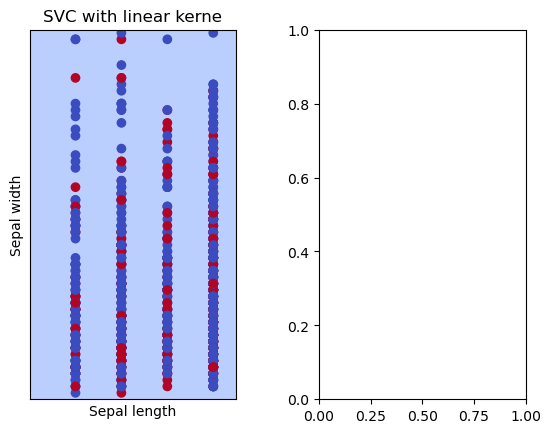

In [32]:
for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Utilisation d'une palette de couleurs
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.6)
    
    # Affichage des points d'apprentissage,
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
